<a href="https://colab.research.google.com/github/Pranay3832/Unlocking-YouTube-Channel-Performance-Secrets./blob/main/Unlocking_YouTube_Channel_Performance_Secrets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Unlocking YouTube Channel Performance Secrets**

Made By : Pranay Kudale

### Step 1 : Importing Important Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings('ignore')

### Step 2 : Loading the DataSet

In [ ]:
data = pd.read_csv("/content/youtube_channel_real_performance_analytics (1).csv")

print("Dataset Loaded Successfully ✅")
print(f"Shape: {data.shape}")
print("\nColumn names:\n", data.columns.tolist())

### Step 3 : Data Preprocessing

In [7]:
# Data Cleaning
data = data.dropna()
data = data.loc[:, ~data.columns.duplicated()]

# Convert Publish Time
if 'Video Publish Time' in data.columns:
    data['Video Publish Time'] = pd.to_datetime(data['Video Publish Time'], errors='coerce')

# Remove extreme outliers
numeric_cols = data.select_dtypes(include=np.number).columns
for col in numeric_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    data = data[(data[col] >= lower) & (data[col] <= upper)]

print(f"\nData after cleaning: {data.shape}")


Data after cleaning: (8, 71)


### Step 4 : Feature Engineering

In [8]:
if {'Estimated Revenue (USD)', 'Views'}.issubset(data.columns):
    data['Revenue per View'] = data['Estimated Revenue (USD)'] / (data['Views'] + 1)
if {'Likes', 'Shares', 'Comments', 'Views'}.issubset(data.columns):
    data['Engagement Rate'] = (data['Likes'] + data['Shares'] + data['Comments']) / (data['Views'] + 1) * 100

### Step 5 : Correlation Analysis

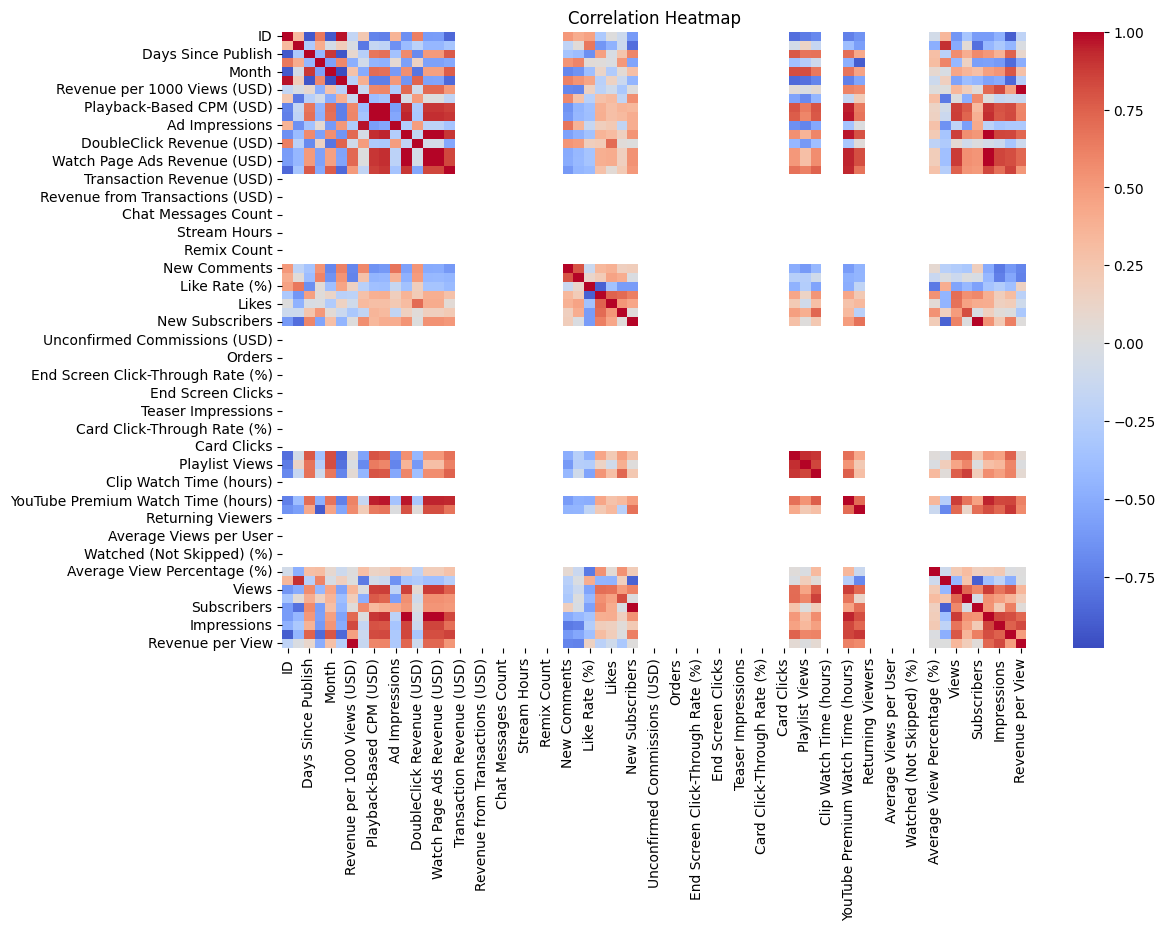


Selected Features: ['YouTube Ads Revenue (USD)', 'Watch Page Ads Revenue (USD)', 'Estimated AdSense Revenue (USD)', 'YouTube Premium Watch Time (hours)', 'CPM (USD)', 'Playback-Based CPM (USD)', 'Views', 'Impressions', 'YouTube\xa0Premium (USD)', 'YouTube Premium Views', 'Video Thumbnail CTR (%)', 'Revenue per View', 'Revenue per 1000 Views (USD)', 'ID', 'Day', 'Playlist Watch Time (hours)', 'Year', 'Watch Time (hours)', 'New Subscribers', 'Subscribers', 'Days Since Publish', 'Views per Playlist Start', 'New Comments', 'Month', 'Video Duration', 'Shares', 'Likes', 'Dislikes', 'Average View Duration', 'Like Rate (%)']


In [10]:
# Drop non-numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=np.number)
corr = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Select top correlated features with target
target = "Estimated Revenue (USD)"
corr_target = corr[target].abs().sort_values(ascending=False)
features = corr_target[corr_target > 0.3].index.drop(target).tolist()
print("\nSelected Features:", features)


### Step 6 : Prepare Data

In [11]:
X = data[features]
y = data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Step 7 : Train Models

In [12]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

### Step 8 : Evaluate


📊 Random Forest Performance:
RMSE: 0.104
R² Score: -8.145

📊 XGBoost Performance:
RMSE: 0.117
R² Score: -10.557


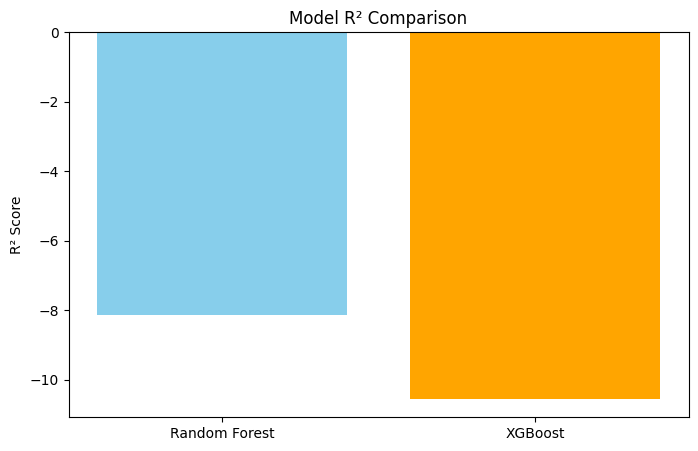

In [13]:
def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {model_name} Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"R² Score: {r2:.3f}")
    return r2

r2_rf = evaluate(y_test, rf_pred, "Random Forest")
r2_xgb = evaluate(y_test, xgb_pred, "XGBoost")

# Compare visually
plt.figure(figsize=(8, 5))
plt.bar(["Random Forest", "XGBoost"], [r2_rf, r2_xgb], color=['skyblue', 'orange'])
plt.title("Model R² Comparison")
plt.ylabel("R² Score")
plt.show()


### Step 9 : Feature Importanc

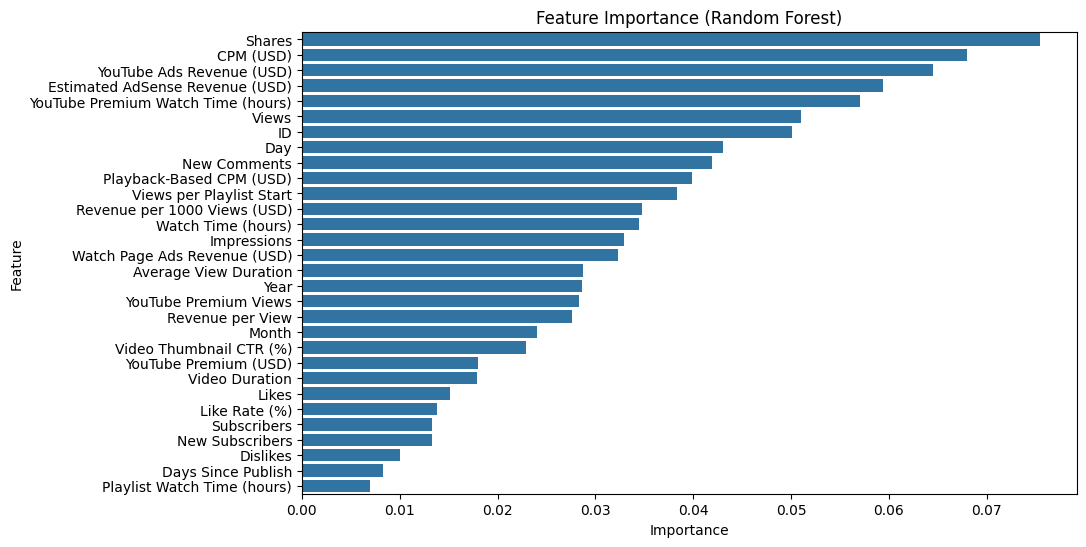

In [14]:
importances = rf_model.feature_importances_
feature_imp = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_imp)
plt.title("Feature Importance (Random Forest)")
plt.show()


### STEP 10 : Save Model

In [15]:
import joblib
joblib.dump(rf_model, "youtube_revenue_predictor.pkl")
print("\nModel saved as 'youtube_revenue_predictor.pkl' ✅")


Model saved as 'youtube_revenue_predictor.pkl' ✅
